In [20]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data_dir = os.getenv('HOME') + '/aiffel/1C_sales_pred'
train_data_path = join(data_dir, 'sales_train.csv')
test_data_path = join(data_dir, 'test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print(train_data_path)
print(test_data_path)

/home/aiffel-dj53/aiffel/1C_sales_pred/sales_train.csv
/home/aiffel-dj53/aiffel/1C_sales_pred/test.csv


In [22]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
train.groupby(['date_block_num'])

In [23]:
x = train['date']
y = train['item_cnt_day']
del train['date']
del train['item_cnt_day']

In [30]:
y

0          0.693147
1          0.693147
2              -inf
3          0.693147
4          0.693147
             ...   
2935844    0.693147
2935845    0.693147
2935846    0.693147
2935847    0.693147
2935848    0.693147
Name: item_cnt_day, Length: 2935849, dtype: float64

In [28]:
y_list = []

for i in y:
    if i > 0:
        y_list.append(i)
    else:
        continue
        
        

In [29]:
y_list

[0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 1.3862943611198906,
 1.0986122886681096,
 0.6931471805599453,
 0.6931471805599453,
 1.0986122886681096,
 0.6931471805599453,
 1.0986122886681096,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 1.0986122886681096,
 0.6931471805

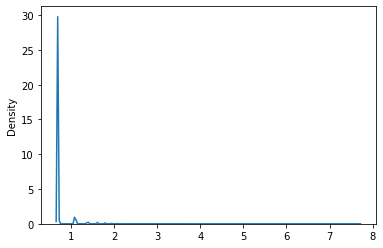

In [31]:
sns.kdeplot(y_list)
plt.show()

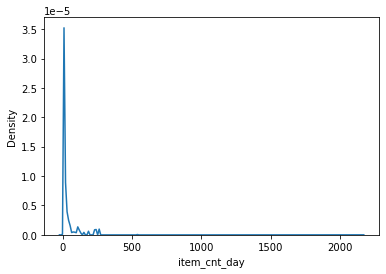

In [25]:
sns.kdeplot(y)
plt.show()

In [32]:
y_list = np.log1p(y_list)
y_list

array([0.52658903, 0.52658903, 0.52658903, ..., 0.52658903, 0.52658903,
       0.52658903])

In [26]:
y = np.log1p(y)
y

0          0.693147
1          0.693147
2              -inf
3          0.693147
4          0.693147
             ...   
2935844    0.693147
2935845    0.693147
2935846    0.693147
2935847    0.693147
2935848    0.693147
Name: item_cnt_day, Length: 2935849, dtype: float64

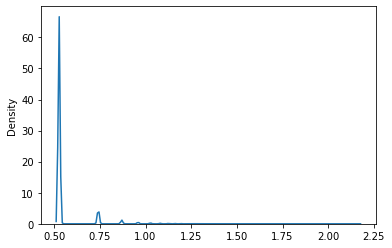

In [33]:
sns.kdeplot(y_list)
plt.show()

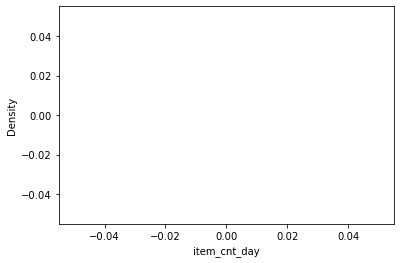

In [27]:
sns.kdeplot(y)
plt.show()